# Wine Quality Prediction
![Wine](https://welpmagazine.com/wp-content/uploads/2020/11/image.jpg)

The original dataset is in the **UCI Machine Learning Repository**. The original datasets include two datasets about red and white wine. This dataset is combined into one dataset by adding a column that represents the color, that is red or white. This data contains 6,497 instances (wines) including 4,898 white wines and 1,599 red wines.
The original dataset has no missing value but the values in this data are randomly eliminated with a probability of 0.01. 

****Now, Let's explore the dataset and do some prediction!!****

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from pandas import Series, DataFrame
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
np.random.seed(500)
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# 2. Import data

In [2]:
Red = pd.read_csv('../input/wine-data-redwhite/winequality-red.csv', sep=';')
White = pd.read_csv('../input/wine-data-redwhite/winequality-white.csv', sep=';')

# 3. Concatenate the Red and White wine datasets

In [3]:
Red['type'] = 'red'
White['type'] = 'white'
wine = pd.concat([Red, White])
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


# Shuffling data

In [4]:
wine = wine.sample(frac=1).reset_index(drop=True)
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white
1,7.1,0.59,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7,red
2,5.7,0.29,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5,white


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# 4. Exploratory data analysis of Wine dataset

Text(0.5, 0, 'Quality')

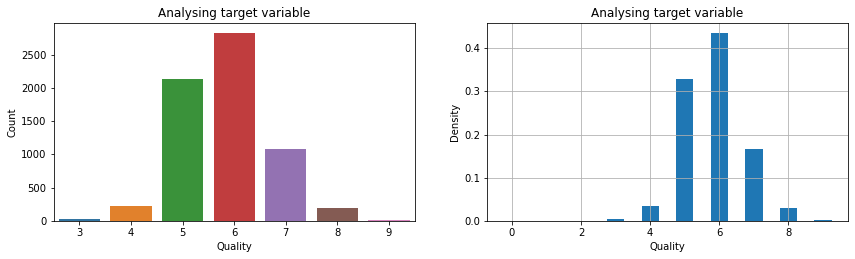

In [6]:
fig = plt.figure(figsize=(22,8)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['quality'])
plt.title("Analysing target variable"); plt.ylabel("Count"); plt.xlabel("Quality")

plt.subplot2grid((2,3),(0,1))
wine['quality'].hist(bins=np.arange(11)-0.5, rwidth=0.5, density=True)
plt.title("Analysing target variable"); plt.ylabel("Density"); plt.xlabel("Quality")

Text(0.5, 1.0, 'Analysing target variable')

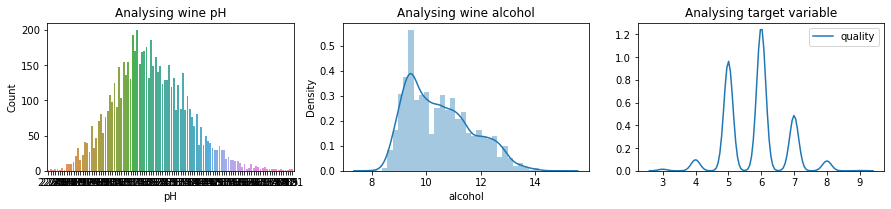

In [7]:
fig = plt.figure(figsize=(15,6)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['pH'])
plt.title("Analysing wine pH"); plt.ylabel("Count"); plt.xlabel("pH")

plt.subplot2grid((2,3),(0,1))
sns.distplot(wine['alcohol'])
plt.title("Analysing wine alcohol"); plt.ylabel("Density"); plt.xlabel("alcohol")

plt.subplot2grid((2,3),(0,2))
sns.kdeplot(wine.query('quality > 2').quality)
plt.title("Analysing target variable")

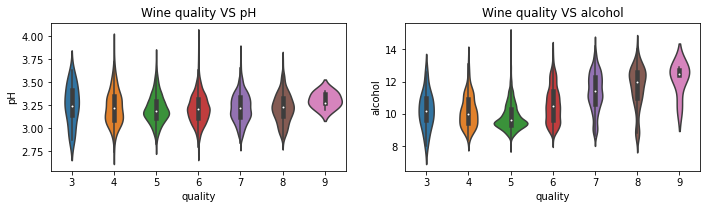

In [8]:
fig = plt.figure(figsize=(18,6)) 
plt.subplot2grid((2,3),(0,0))
sns.violinplot(x='quality', y='pH', data=wine)
plt.title("Wine quality VS pH");

plt.subplot2grid((2,3),(0,1))
sns.violinplot(x='quality', y='alcohol', data=wine)
plt.title("Wine quality VS alcohol");

white    4898
red      1599
Name: type, dtype: int64

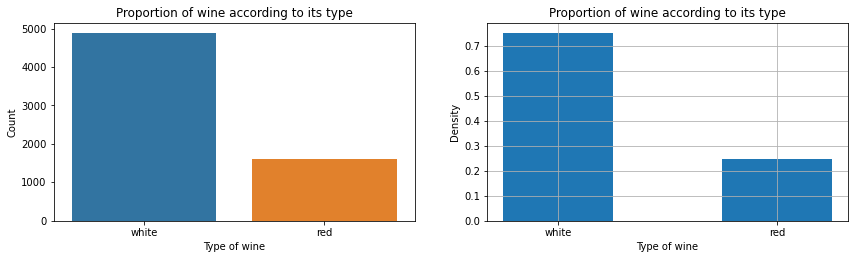

In [9]:
fig = plt.figure(figsize=(22,8)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['type'])
plt.title("Proportion of wine according to its type"); plt.ylabel("Count"); plt.xlabel("Type of wine")

plt.subplot2grid((2,3),(0,1))
wine['type'].hist(bins=np.arange(3)-0.5, rwidth=0.5, density=True)
plt.title("Proportion of wine according to its type"); plt.ylabel("Density"); plt.xlabel("Type of wine")

wine['type'].value_counts()

Text(0.5, 0, 'Type of wine')

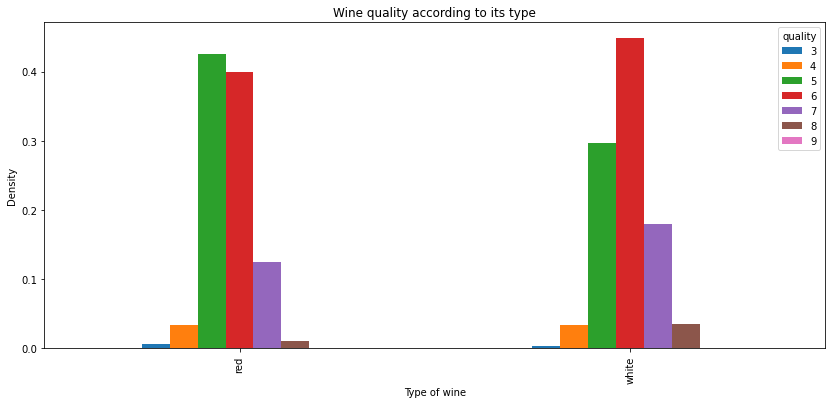

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
Viz = pd.crosstab(wine['type'], wine['quality'])
Viz.div(Viz.sum(axis=1), axis=0).plot.bar(ax=ax)
plt.title("Wine quality according to its type"); plt.ylabel("Density"); plt.xlabel("Type of wine")

Text(0.5, 0.98, 'Relationship between continuous variables')

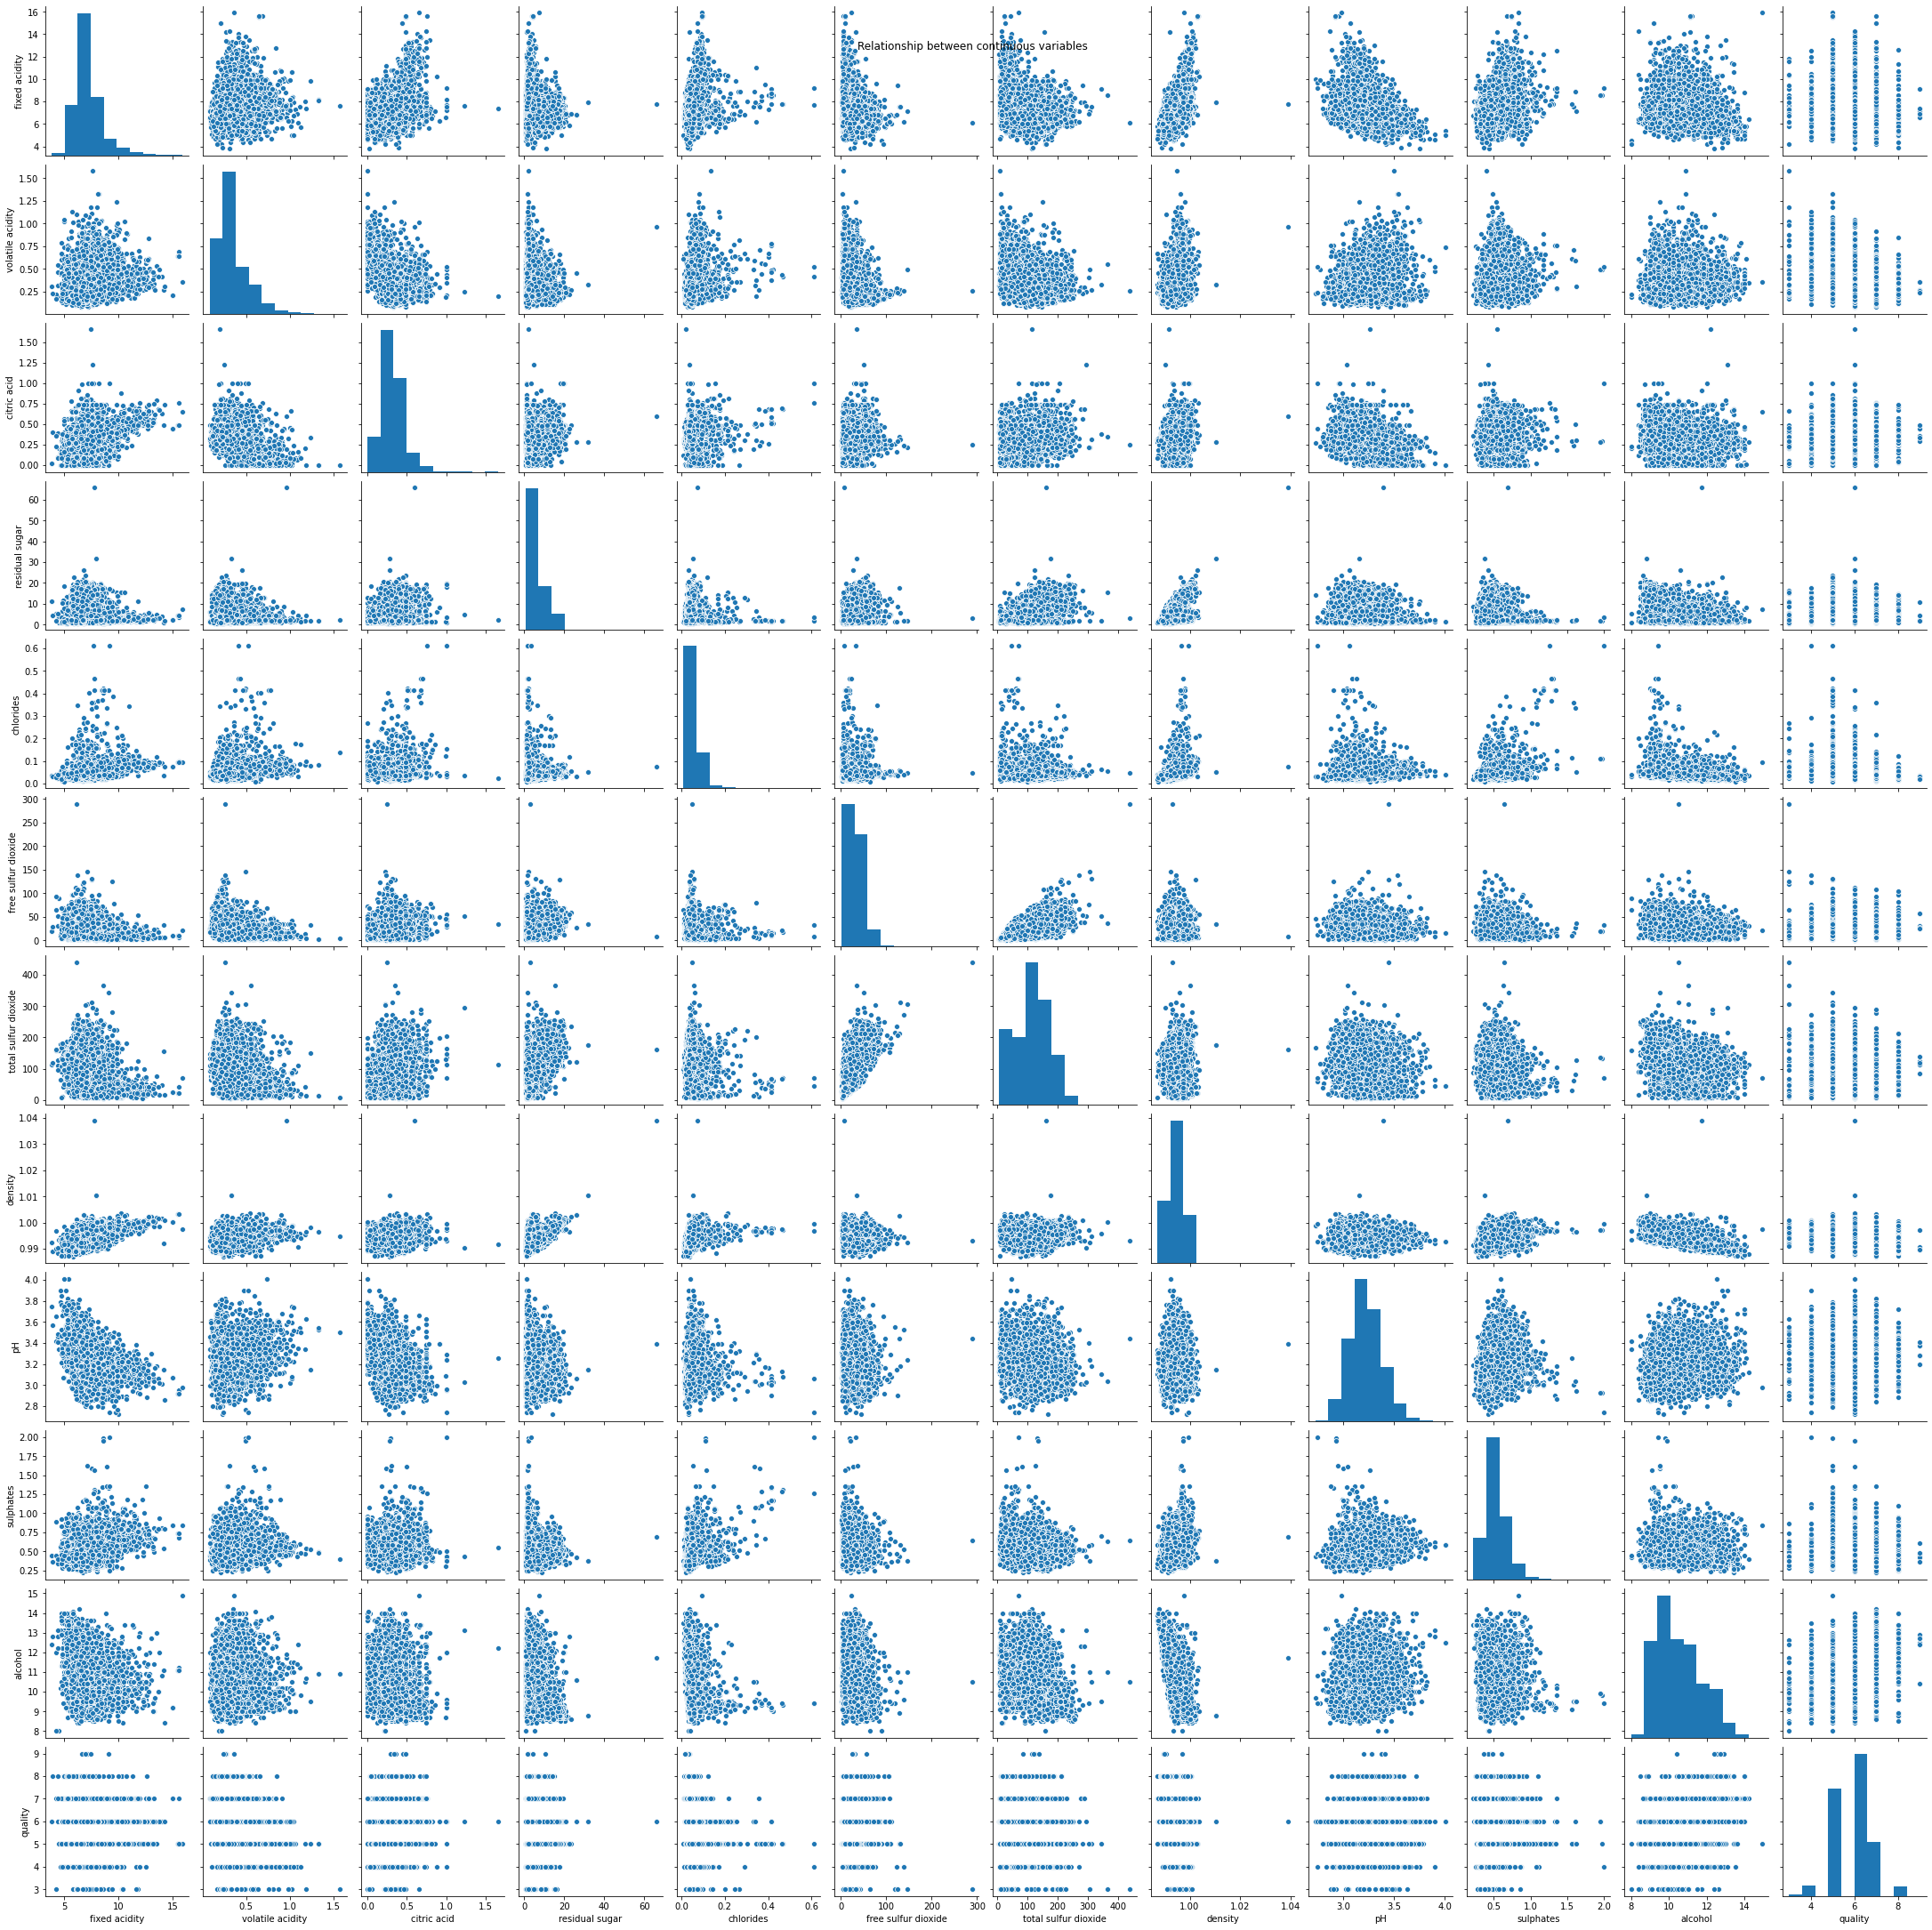

In [11]:
wine.columns
sns.pairplot(wine)
plt.suptitle('Relationship between continuous variables')

Text(0.5, 0.98, 'Univariate analysis on continuous variables')

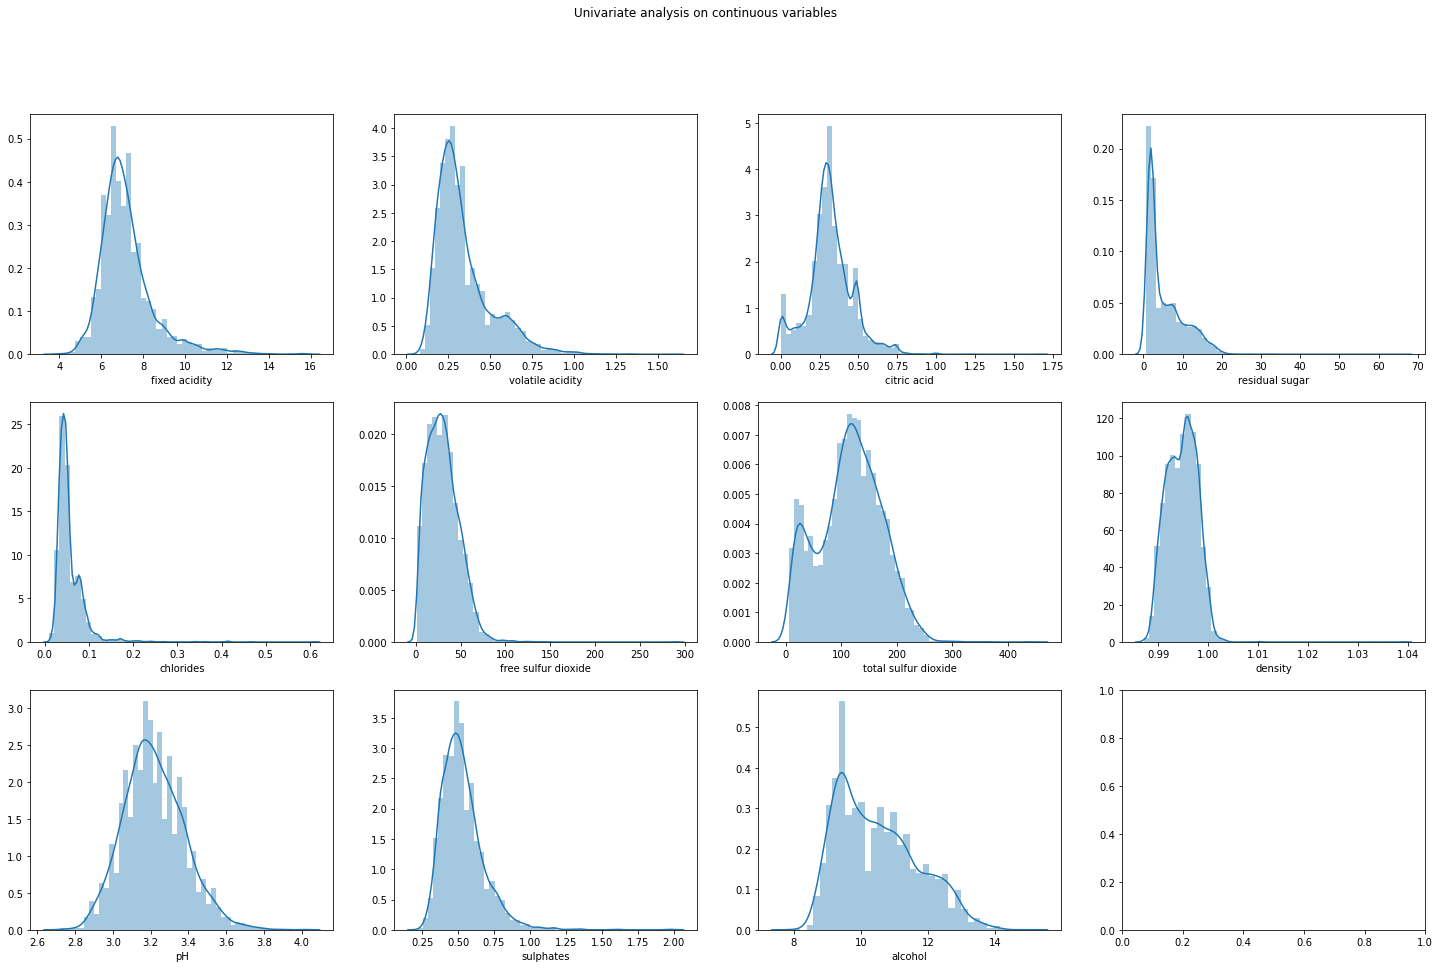

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
continuous_features = list(wine.columns)
continuous_features.remove('quality')
continuous_features.remove('type')
axs = axs.ravel()

for ax, colname in zip(axs, continuous_features):
    sns.distplot(wine[colname], ax=ax)
    
plt.suptitle('Univariate analysis on continuous variables')

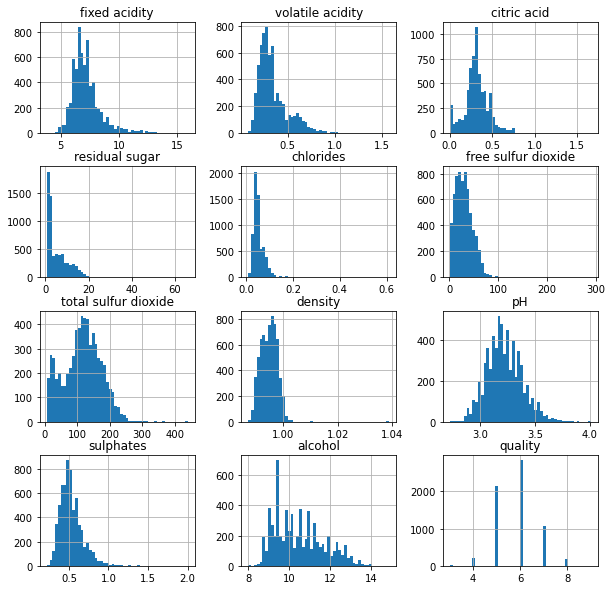

In [13]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

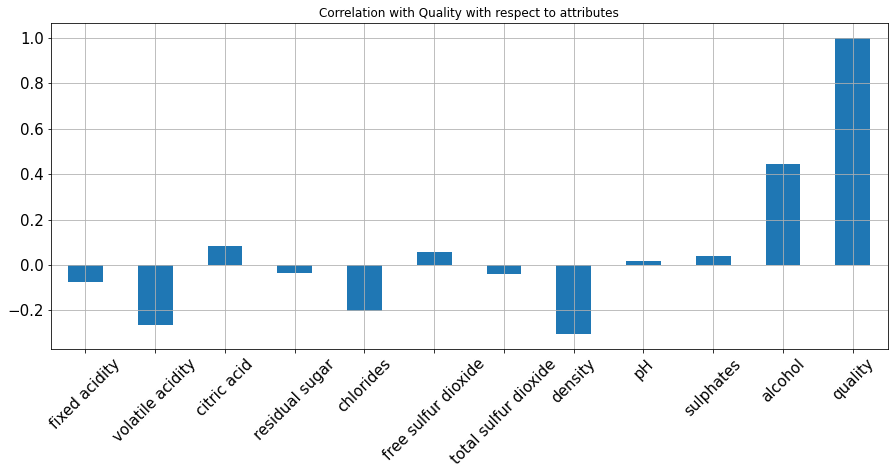

In [14]:
wine.corrwith(wine.quality).plot.bar(figsize = (15, 6), title = "Correlation with Quality with respect to attributes", fontsize = 15, rot = 45, grid = True)

# 5. Clustering Wine data with Principal component analysis (PCA)

Text(0.5, 1.0, 'Wine data separated in two clusters')

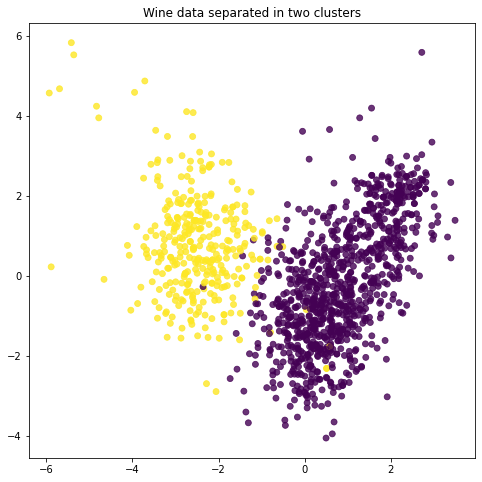

In [15]:
sc = StandardScaler()
pca = PCA(n_components = 2)

# Standardize & project data on a 2-dimensional plane
types = (wine['type']=='red').astype(int).values
scaled_wines = sc.fit_transform(wine[continuous_features])
twodim_wines = pca.fit_transform(scaled_wines)

# Display data
fig, ax = plt.subplots(figsize=(8, 8))
n = int(0.2 * wine.shape[0])
plt.scatter(twodim_wines[:n,0], twodim_wines[:n,1], c=types[:n], alpha=.8, linewidth=.8)
plt.title("Wine data separated in two clusters")

# 6. Create Classification version of target variable

In [16]:
wine = wine.drop('type',axis=1)
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7
1,7.1,0.59,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7
2,5.7,0.29,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5


In [17]:
#define wine class [1 = 'Good Quality', 0 = 'Bad Quality']
wine['def_quality'] = [0 if x < 7 else 1 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','def_quality'], axis = 1)
Y = wine['def_quality']

Text(0.5, 0, 'Type of wine')

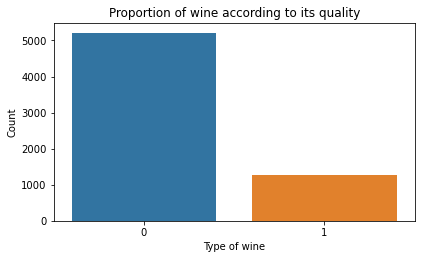

In [18]:
wine['def_quality'].value_counts()

fig = plt.figure(figsize=(22,8)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['def_quality'])
plt.title("Proportion of wine according to its quality"); plt.ylabel("Count"); plt.xlabel("Type of wine")

# 7. Prediction of Wine quality

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=7)

In [20]:
#Hyperparameter tuning of classifier
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [50, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

Kcv= KFold(n_splits=5, random_state=100)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv = Kcv,scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best LR: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best LR: 0.816706 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [21]:
classifier = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)
confusion_mat = confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix \n", confusion_mat)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.825846   0.631148  0.244444  0.352403

 Confusion Matrix 
 [[1265   45]
 [ 238   77]]


In [ ]:
#Hyperparameter tuning of XGBclassifier
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
Kcv= KFold(n_splits=10, random_state=100)
xgb_model = XGBClassifier()
grids = GridSearchCV(estimator = xgb_model, param_grid = param_tuning, cv = Kcv, n_jobs = -1, scoring='accuracy',error_score=0)

#gsearch.fit(X_train,y_train)
grid_result = grids.fit(X_train, y_train)
print("Best LR: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [22]:
import xgboost as xgb
cm = xgb.XGBClassifier(n_estimators = 1000)
cm.fit(X_train, y_train)
y_pred = cm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBoost Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)
confusion_mat = confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix \n", confusion_mat)

                Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost Classifier  0.897231   0.760563  0.685714  0.721202

 Confusion Matrix 
 [[1242   68]
 [  99  216]]


**XGBoost Outperformed! Better F1 Score as well.**
Hope You Liked the EDA. :)

***For more exciting notebooks visit my Kaggle workspace!***  [ https://www.kaggle.com/pankajbhowmik ]